<a href="https://colab.research.google.com/github/ImNotDanish05/2025_Visi-Komputer_TI-2A/blob/main/Jobsheet02_KLASIFIKASI-GAMBAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By: ImNotDanish05

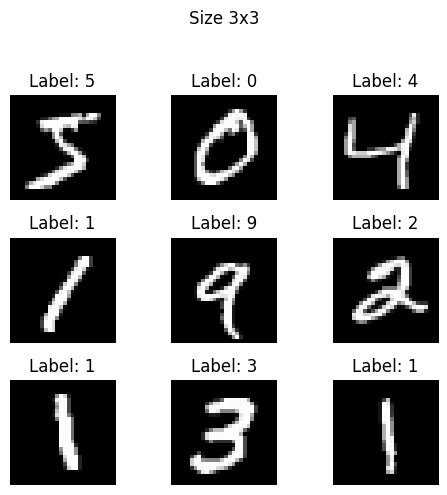

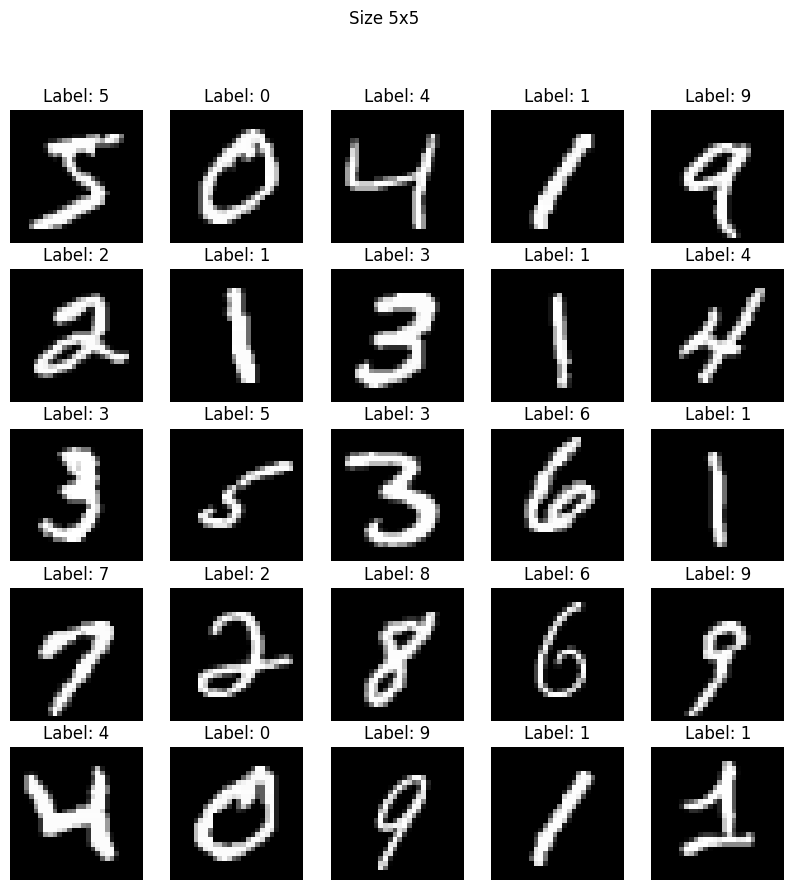

In [12]:
# @title Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana
"""
Tugas kecil: Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak
contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?
"""

# Load package
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
plt.suptitle("Size 3x3")
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


plt.figure(figsize=(10,10))
plt.suptitle("Size 5x5")
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [8]:
# @title Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional
"""
Tugas kecil: Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap akurasi?
"""
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten data dari 2D jadi 1D Vektor
x_train_flatten = x_train.reshape(len(x_train), -1) / 255.0
x_test_flatten = x_test.reshape(len(x_test), -1) / 255.0

# Training Model
clflinear = svm.SVC(kernel='linear', gamma='scale') # Linear
clfrbf = svm.SVC(kernel='rbf', gamma='scale') # RBF

# Gunakan subset karena SVM berat :)
# Batasi masing2 hanya 5000
clflinear.fit(x_train_flatten[:5000], y_train[:5000])
clfrbf.fit(x_train_flatten[:5000], y_train[:5000])

y_predlinear = clflinear.predict(x_test_flatten)
y_predrbf = clfrbf.predict(x_test_flatten)

print("Akurasi Linear: ", accuracy_score(y_test, y_predlinear))
print("Akurasi RBF: ", accuracy_score(y_test, y_predrbf))

Akurasi Linear:  0.9101
Akurasi RBF:  0.9513


In [14]:
# @title Praktikum D3 – Membangun CNN Sederhana
"""
Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?
"""
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)


modeltugas = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
modeltugas.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

historytugas = modeltugas.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8926 - loss: 0.3673 - val_accuracy: 0.9813 - val_loss: 0.0669
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.9790 - loss: 0.0679 - val_accuracy: 0.9847 - val_loss: 0.0579
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 0.9864 - loss: 0.0456 - val_accuracy: 0.9875 - val_loss: 0.0504
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9865 - val_loss: 0.0505
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9818 - val_loss: 0.0660
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.8912 - loss: 0.3476 - val_accuracy: 0.9820 - val_loss: 0.0569
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9839 - loss: 0.0516 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9889 - loss: 0

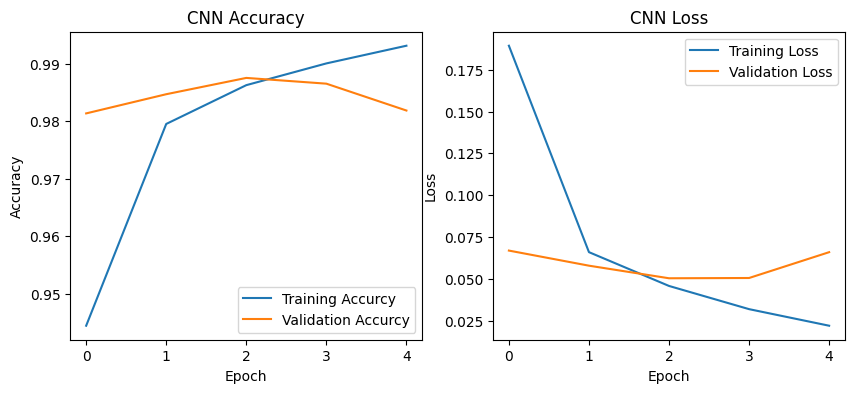

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9766 - loss: 0.0761


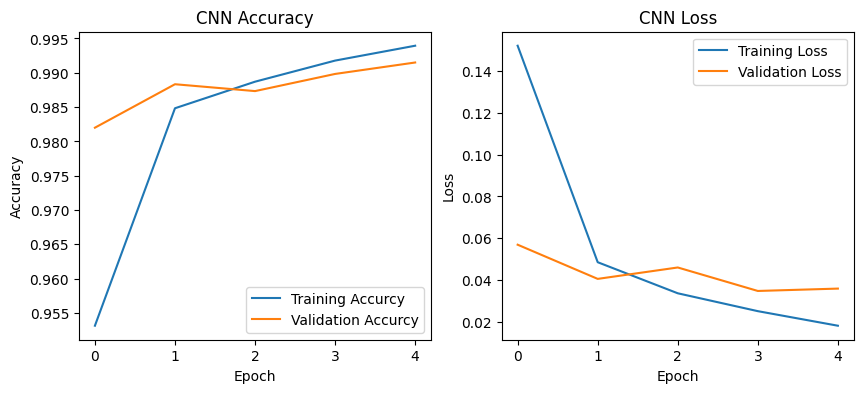

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9841 - loss: 0.0448


[0.03424535319209099, 0.9887999892234802]

In [16]:
# ===== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accurcy')
plt.plot(history.history['val_accuracy'], label='Validation Accurcy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
model.evaluate(x_test_cnn, y_test)

# ===== Plot History Tugas =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(historytugas.history['accuracy'], label='Training Accurcy')
plt.plot(historytugas.history['val_accuracy'], label='Validation Accurcy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(historytugas.history['loss'], label='Training Loss')
plt.plot(historytugas.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
modeltugas.evaluate(x_test_cnn, y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


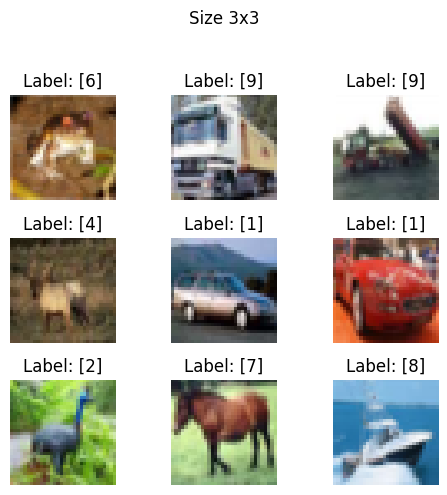

In [17]:
# @title Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)
"""
Tugas kecil: Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa
pengaruhnya pada overfitting?
"""

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(5,5))
plt.suptitle("Size 3x3")
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
evaluatemodel = model.evaluate(x_test, y_test)


modeltugas = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

modeltugas.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

historytugas = modeltugas.fit(x_train, y_train, epochs=5, validation_split=0.1)

evaluatemodeltugas = modeltugas.evaluate(x_test, y_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.3667 - loss: 1.7316 - val_accuracy: 0.5694 - val_loss: 1.2158
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 95s 58ms/step - accuracy: 0.5835 - loss: 1.1880 - val_accuracy: 0.6038 - val_loss: 1.1340
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.6464 - loss: 1.0101 - val_accuracy: 0.6626 - val_loss: 0.9710
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 53ms/step - accuracy: 0.6861 - loss: 0.9114 - val_accuracy: 0.6738 - val_loss: 0.9482
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.7155 - loss: 0.8297 - val_accuracy: 0.6916 - val_loss: 0.9124
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6770 - loss: 0.9413
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step - accuracy: 0.2786 - loss: 1.9561 - val_accuracy: 0.5060 - val_loss: 1.3911
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - accuracy: 0.4474 - loss: 1.5140 - val_accuracy: 0.5662 - val_loss: 1.2293
Epoch 3

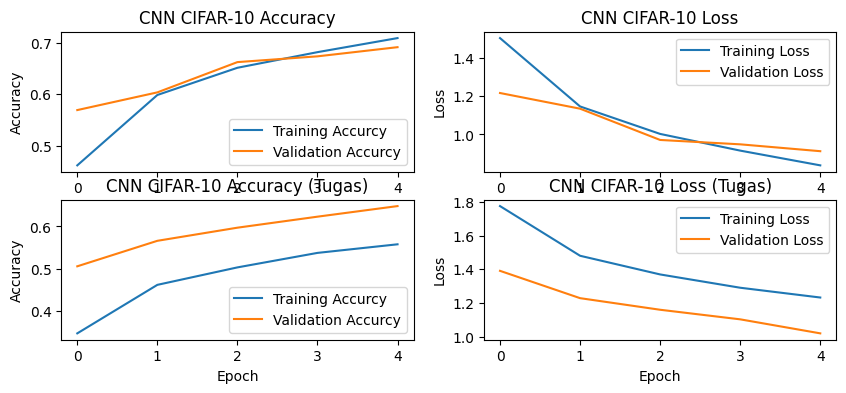

===== Evaluate ===
Tanpa Dropout: [0.9503588080406189, 0.6769999861717224]
Dengan Dropout: [1.0490137338638306, 0.6366999745368958]


In [21]:
# ===== Plot History =====
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='Training Accurcy')
plt.plot(history.history['val_accuracy'], label='Validation Accurcy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2,2,3)
plt.plot(historytugas.history['accuracy'], label='Training Accurcy')
plt.plot(historytugas.history['val_accuracy'], label='Validation Accurcy')
plt.title('CNN CIFAR-10 Accuracy (Tugas)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2,2,4)
plt.plot(historytugas.history['loss'], label='Training Loss')
plt.plot(historytugas.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss (Tugas)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("===== Evaluate ===")
print("Tanpa Dropout: " + str(evaluatemodel))
print("Dengan Dropout: " + str(evaluatemodeltugas))

In [22]:
# @title Praktikum D5 – Transfer Learning dengan Model Pra-Latih
"""
Tugas kecil: Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning). Bagaimana
akurasinya berubah?
"""

from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32, 32, 3)
                   )
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
evaluatemodel = model.evaluate(x_test, y_test)



base_model_tugas = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32, 32, 3)
                   )
base_model_tugas.trainable = False

# Yang sebelumnya false semua, Buka 2 layer terakhir (fine-tuning)
for layer in base_model_tugas.layers[-2:]:
    layer.trainable = True

model_tugas = models.Sequential([
    base_model_tugas,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_tugas.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

historytugas = model_tugas.fit(x_train, y_train, epochs=5, validation_split=0.1)
evaluatemodeltugas = model_tugas.evaluate(x_test, y_test)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 578s 408ms/step - accuracy: 0.4681 - loss: 1.5169 - val_accuracy: 0.5814 - val_loss: 1.1891
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 615s 403ms/step - accuracy: 0.5839 - loss: 1.1880 - val_accuracy: 0.5914 - val_loss: 1.1625
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 571s 406ms/step - accuracy: 0.6120 - loss: 1.1148 - val_accuracy: 0.6050 - val_loss: 1.1249
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 619s 403ms/step - accuracy: 0.6254 - loss: 1.0682 - val_accuracy: 0.5994 - val_loss: 1.1324
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 625s 406ms/step - accuracy: 0.6448 - loss: 1.0142 - val_accuracy: 0.6146 - val_loss: 1.0940
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 369ms/step - accuracy: 0.6070 - loss: 1.1144
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 642s 455ms/step - accuracy: 0.5065 - loss: 1.4157 - val_accuracy: 0.6112 - val_loss: 1.0980
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 686s 457ms/step - accuracy: 0.6

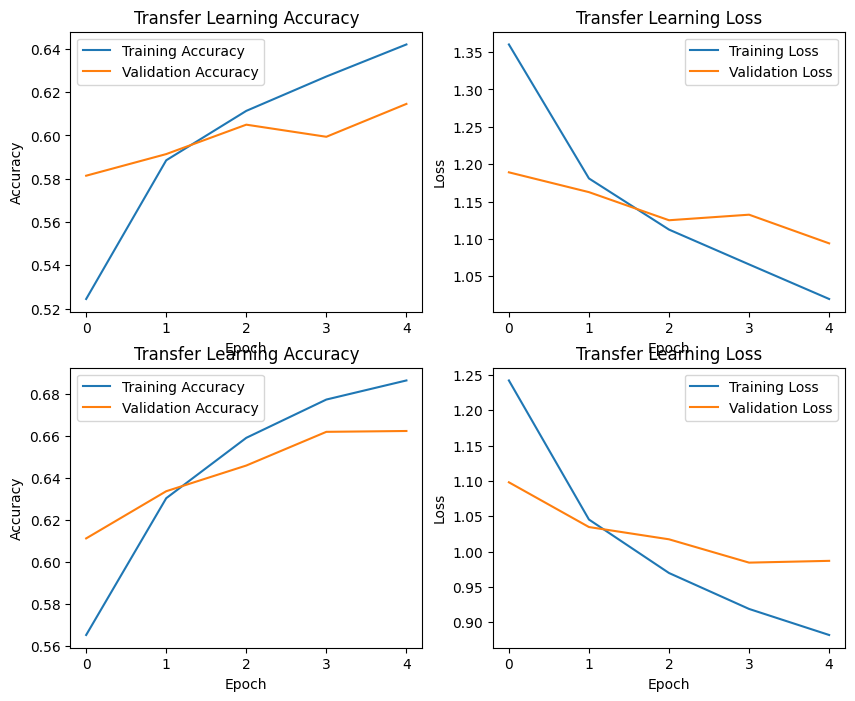

In [24]:
# ===== Plot history =====
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# ===== Plot history tugas =====
plt.subplot(2,2,3)
plt.plot(historytugas.history['accuracy'], label='Training Accuracy')
plt.plot(historytugas.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2,2,4)
plt.plot(historytugas.history['loss'], label='Training Loss')
plt.plot(historytugas.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# @title Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain
"""
Tugas kecil: Dari confusion matrix, identifikasi kelas apa yang paling sering salah
diklasifikasikan. Menurut Anda, mengapa hal itu bisa terjadi?
"""
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()